In [1]:
# Importing Libraries : Random, Numpy, Matplotlib.pyplot,math
import random
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# Bernoli destribution
def bernoulli_trial(probability_of_success):
    # Generate a random number between 0 and 1
    rand = random.random()

    # Check if the random number is less than the probability of success
    if rand < probability_of_success:
        return 1  # Success
    else:
        return 0  # Failure

In [3]:
#Bernoli Destribution Monte Carlo sampling
def montecarlo_bernoulli(probability_of_success,num_trials):
     # Perform Monte Carlo simulation
    reward = 0

    for _ in range(num_trials):
        result = bernoulli_trial(probability_of_success)
        reward += result

    #Return the Net sum of Reward.
    return reward

In [4]:
# Part-1 (ETC)
if __name__ == "__main__":
    #For Arm-1 probability of success
    p1=0.5

    #For Arm-2 probability of success
    p2=0.75

    #Number of samples
    T=10000 

    #Number of Trials for each arm in exploration stage, calculated from formula given in question.
    m = math.ceil(T**(2/3) * (math.log10(T))**(1/3))
    
    # Intialising Total Sample Regret which must be zero initially
    Net_Sample_Regret=0.0
    for i in range(1,500):
        # Intialising total reward which is zero intially
        reward=0
        #Exploration Stage:
        #Playing Arm-1 m times
        reward1=montecarlo_bernoulli(p1,m)
        reward+=reward1
        #Playing Arm-2 m times
        reward2=montecarlo_bernoulli(p2,m)
        reward+=reward2

        #Commiting Stage
        # If Reward of Arm2 is better than reward of Arm-1 then Play Arm-2 rest T-2m times
        # Otherwise play Arm-1 for the rest T-2m times
        if(reward2>=reward1):
            reward+=montecarlo_bernoulli(p2,T-2*m)
        else:
            reward+=montecarlo_bernoulli(p1,T-2*m)
        
        #Sample_Regret is the regret for this experiment.
        Sample_Regret=p2*T-reward
        #Net_Sample_Regret is the total regret of the experiment till now
        Net_Sample_Regret+=Sample_Regret

    #Expected_Regret is the Net_Sample_Regret/500 as the total number times the experiment is repeated is 500
    Expected_Regret=Net_Sample_Regret/500
    #Printing the Expected Regret
    print("The Expected Regret is : ",Expected_Regret)

The Expected Regret is :  183.088


In [5]:
# Part-2 (ETC for range of Delta)
if __name__ == "__main__":
    #Value of delta
    delta=[0.05,0.1,0.2,0.3,0.4,0.5]
    # Array to store the expected regret for each value of delta
    Estimated_Regret=[]

    #Running for loop 6 times because 6 values of delta
    for i in range(0,6):
        #Probability of success for Arm-1
        p1=0.5

        #Probability of success for Arm-2
        p2=0.5+delta[i]
        #Total number of samples
        T=10000

        #Number of samples for each arm in exploration phase
        m = math.ceil(T**(2/3) * (math.log10(T))**(1/3))
        #Net Sample Regret
        Net_Sample_Regret=0.0
        #Conducting 500 experiments
        for i in range(1,500):
            #Initial total reward is Zero when the experiment begin
            reward=0
            #Playing Arm-1 m times (Exploration)
            reward1=montecarlo_bernoulli(p1,m)
            reward+=reward1
            #Playing Arm-2 m times (Exploration)
            reward2=montecarlo_bernoulli(p2,m)
            reward+=reward2

            #If net reward of Arm-2 is greater than the net reward of Arm-1 then Commiting to Arm-2
            #Otherwise Commiting to Arm-1 
            if(reward2>=reward1):
                reward+=montecarlo_bernoulli(p2,T-2*m)
            else:
                reward+=montecarlo_bernoulli(p1,T-2*m)

            #Sample regret for this Experiment
            Sample_Regret=p2*T-reward
            #Net regret for all the experiment
            Net_Sample_Regret+=Sample_Regret


        #Expected Regret i.e the average of regret in 500 experiments
        Expected_Regret=Net_Sample_Regret/500
        #Store the expected Regret in the list for plotting
        Estimated_Regret.append(Expected_Regret)
    #Print the estimated Regret array
    print(Estimated_Regret)
    

[51.632, 71.526, 147.506, 221.232, 292.198, 368.016]


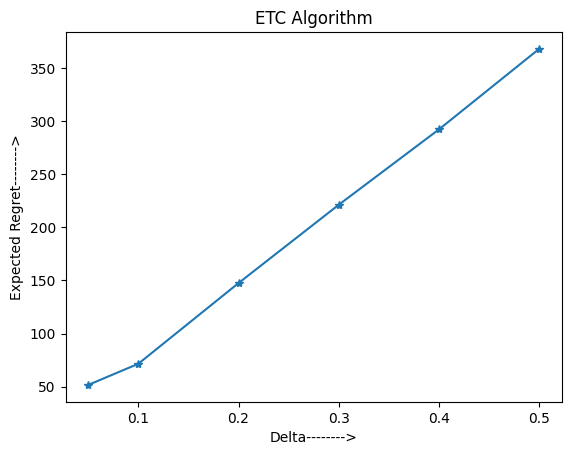

In [6]:
#Plotting the Expected Regret vs Delta for the ETC Algorithm
plt.plot(delta,Estimated_Regret,marker='*')
plt.xlabel('Delta-------->')
plt.ylabel('Expected Regret-------->')
plt.title('ETC Algorithm')
plt.show()

In [7]:
# Epsilon Calculation for arm in UCB for the calculation of the Upper Confidence bound
def Epsilon(T,n):
    # Expression for the epsilon is used as derived in the Class
    e = math.sqrt((3 * math.log10(T)) / (2 * n))
    return e

In [8]:
# Part-3(UCB algorithms for range of delta)
if __name__ == "__main__":
    # range of delta
    delta=[0.05,0.1,0.2,0.3,0.4,0.5]
    # Array to store Estimated regret for range of delta
    Estimated_Regret_UCB=[]
    #  A for loop runned 6 times because 6 values of delta
    for i in range(6):
        #For Arm-1
        #Probability of Success
        #Number of times Arm-1 is played
        p1=0.5
        n1=0
        
        #For Arm-2
        #Probability of Success
        #Number of times Arm-2 is played
        p2=0.5+delta[i]
        n2=0

        #Total time for which 1experiment will run
        T=10000
        #This will store the Total Regret of UCB for a delta
        Net_Sample_Regret_ucb=0.0
        for j in range(500):
            # Total reward in 1 expermient
            reward_ucb=0.0
            #Playing Arm-1 one time and storing the sample probability of success(which will be initially 0 or 1)
            sample_p1=bernoulli_trial(p1)
            n1=1
            #Playing Arm-2 one time and storing it's sample probability of success(which will be initially 0 or 1)
            sample_p2=bernoulli_trial(p2)
            n2=1
            #Adding the reward from each of them
            reward_ucb+=(sample_p1+sample_p2)
            #For T-2 times applying UCB
            for k in range(T-2):
                # Calculating Epsilon for Arm-1 and Arm-2 using the Epsilon function created above
                e1=Epsilon(T-2,n1)
                e2=Epsilon(T-2,n2)
                # If upper confidence bound of Arm-1 is greater than Arm-2 then play Arm-1 otherwise play Arm-2
                if(sample_p1+e1>sample_p2+e2):
                    #Playing Arm-1
                    reward1_ucb=bernoulli_trial(p1)
                    #Adding the reward of Arm-1 to net reward
                    reward_ucb+=reward1_ucb
                    #Updating the sample probability of success for Arm-1
                    sample_p1=(sample_p1*n1+reward1_ucb)/(n1+1)
                    #Updating how many times Arm-1 is played
                    n1+=1
                else:
                    #Playing Arm-2
                    reward2_ucb=bernoulli_trial(p2)
                    #Adding the reward of Arm-2 to net reward
                    reward_ucb+=reward2_ucb
                    #Updating the sample probability of success of Arm-2
                    sample_p2=(sample_p2*n2+reward2_ucb)/(n2+1)
                    #Updating how many times Arm-2 is played
                    n2+=1
            # Calculating the total Sample regret.
            Net_Sample_Regret_ucb+=p2*T-reward_ucb
        #Calculating the expected Regret of UCB for this value of delta
        Expected_Regret_ucb=Net_Sample_Regret_ucb/500
        #Storing the Expected value of regret for this value of delta
        Estimated_Regret_UCB.append(Expected_Regret_ucb)

    #Printing the Expected Regret for different values of Delta
    print(Estimated_Regret_UCB)
                
                

[53.466, 36.818, 23.49, 18.44, 14.588, 11.044]


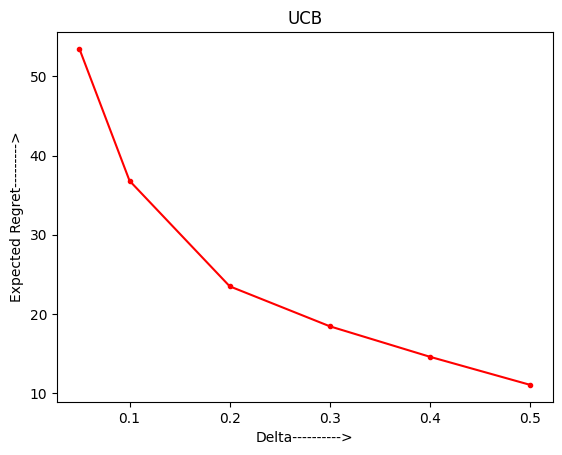

In [9]:
#Plot for UCB
#Plotting the Expected Regret vs Delta for UCB Algorithm
plt.title('UCB')
plt.plot(delta,Estimated_Regret_UCB,marker='.',color='red')
plt.xlabel('Delta---------->')
plt.ylabel('Expected Regret--------->')
plt.show()

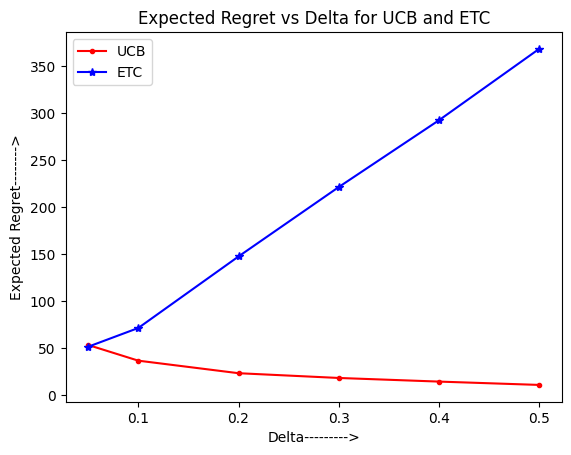

In [10]:
#Plots Comparision
# Comparing the plots of Expected Regret vs Delta for UCB and ETC Algoritm
plt.title('Expected Regret vs Delta for UCB and ETC')
plt.plot(delta,Estimated_Regret_UCB,marker='.',label='UCB',color='Red')
plt.plot(delta,Estimated_Regret,marker='*',label='ETC',color='Blue')
plt.xlabel('Delta--------->')
plt.ylabel('Expected Regret-------->')
plt.legend()
plt.show()